In [44]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import fcluster
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer



# Step 1: Load the dataset

In [45]:
df = pd.read_csv("UsArrests.csv")
# Extract only numeric columns (excluding "City")
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
df.head()

,City,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [46]:
# Check if there are non-numerical features
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   City      50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 1.8+ KB
None


# Check for missing values

In [47]:
# Check for missing values
missing_values = df.isnull().sum()
if missing_values.sum() == 0:
    print("There are no missing values in the dataset.")

There are no missing values in the dataset.


# Check for outliers (visual inspection)

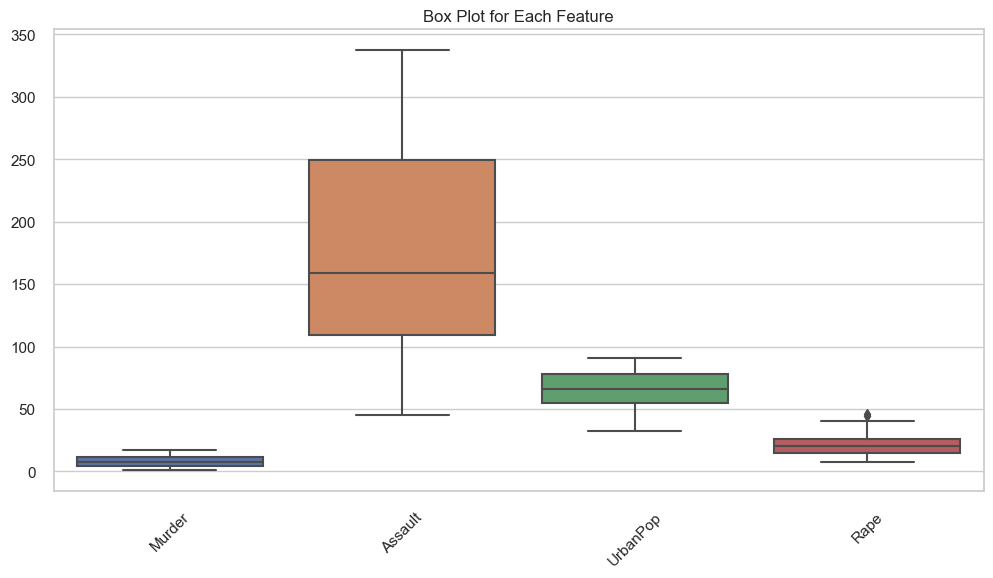

In [48]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.title("Box Plot for Each Feature")
plt.xticks(rotation=45)
plt.show()


 # Handle missing values (if any)

In [49]:
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df[numeric_columns]), columns=numeric_columns)


# Data Visualization and Analysis:

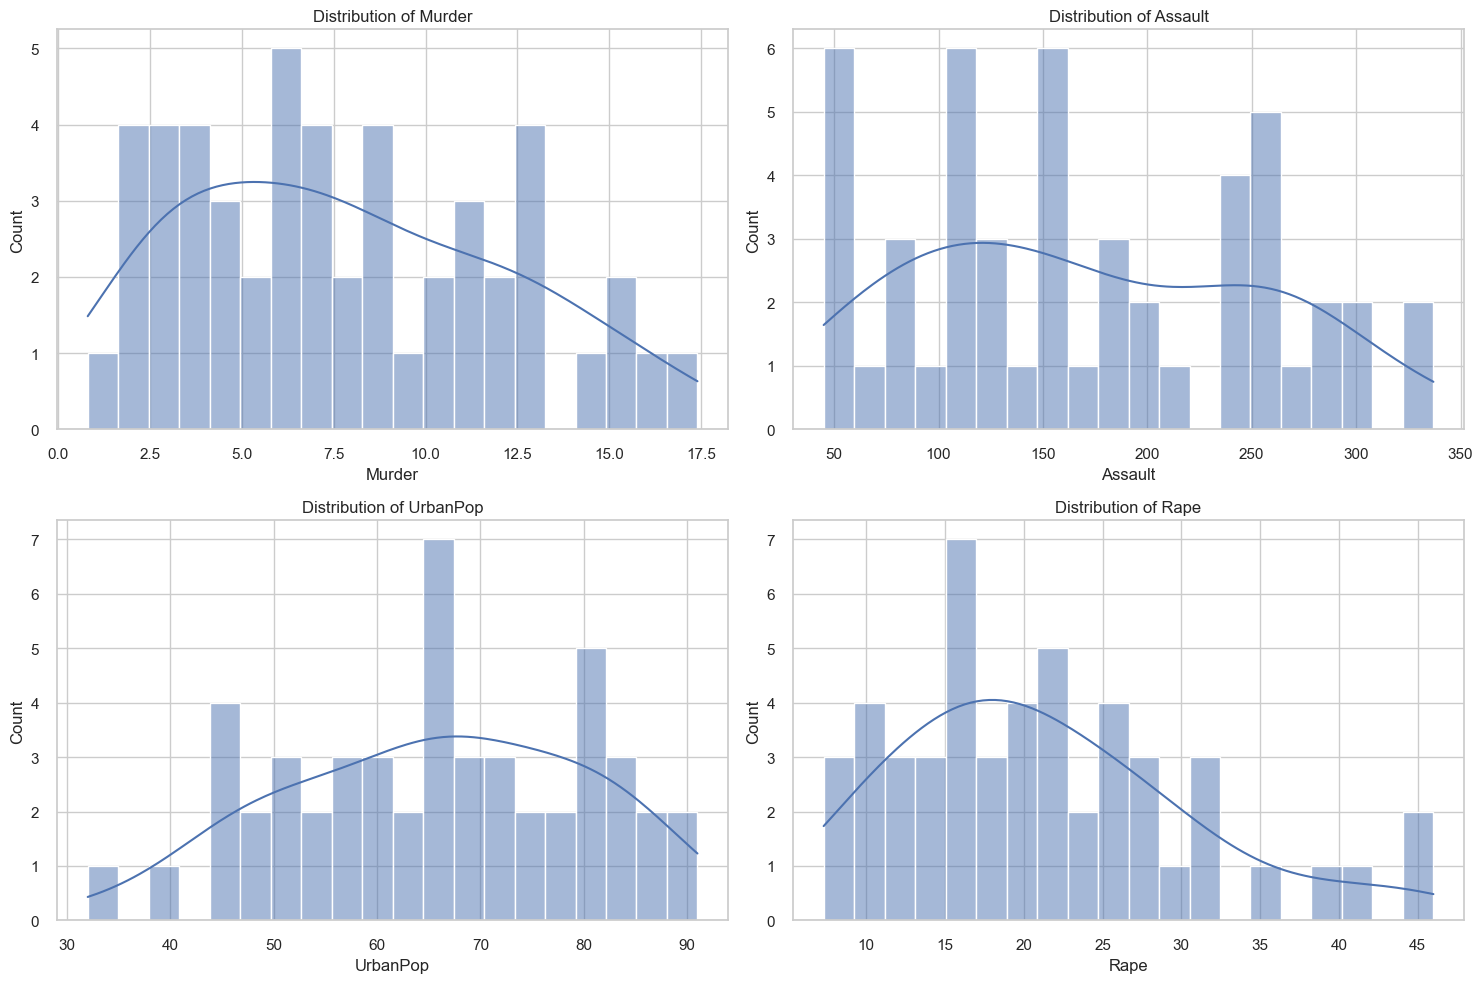

In [50]:
# Visualize the distribution of each feature
sns.set(style="whitegrid")
plt.figure(figsize=(15, 10))
for i, col in enumerate(df.columns[1:]):
    plt.subplot(2, 2, i + 1)
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


# Assault:

The distribution of Assault exhibits right-skewness, with a majority of states having lower crime rates. However, there is a notable long tail on the right side, indicating a few states with higher-than-average crime rates. This suggests that Assault is not normally distributed, and there may be outliers in this feature.

# Murder:

The distribution of Murder is positively skewed, with a similar pattern as Assault. Most states have lower murder rates, but there are a few with higher-than-average rates. The presence of outliers is evident, and this feature also deviates from a normal distribution.

# Rape:

The distribution of Rape is right-skewed, similar to Assault and Murder. The majority of states have lower rape rates, but outliers with high rates are visible. This skewness and the presence of outliers indicate that Rape is not normally distributed.

# UrbanPop:

The distribution of UrbanPop appears to be somewhat bimodal. There are two noticeable peaks, suggesting that states can be divided into two distinct groups in terms of their urban population percentages. This bimodality may indicate the presence of two different types of states – those with high urbanization and those with lower urbanization.

# Standardize the data

In [51]:
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_imputed), columns=numeric_columns)

# Display the first few rows of the preprocessed data

In [52]:

print("Preprocessed Data (Standardized):\n", df_scaled.head())

Preprocessed Data (Standardized):
      Murder   Assault  UrbanPop      Rape
0  1.255179  0.790787 -0.526195 -0.003451
1  0.513019  1.118060 -1.224067  2.509424
2  0.072361  1.493817  1.009122  1.053466
3  0.234708  0.233212 -1.084492 -0.186794
4  0.281093  1.275635  1.776781  2.088814


# Step 2: Exploratory Data Analysis (EDA)

# Summary statistics

In [53]:

summary_stats = df.describe()
print("Summary Statistics:\n", summary_stats)


Summary Statistics:
          Murder     Assault   UrbanPop       Rape
count  50.00000   50.000000  50.000000  50.000000
mean    7.78800  170.760000  65.540000  21.232000
std     4.35551   83.337661  14.474763   9.366385
min     0.80000   45.000000  32.000000   7.300000
25%     4.07500  109.000000  54.500000  15.075000
50%     7.25000  159.000000  66.000000  20.100000
75%    11.25000  249.000000  77.750000  26.175000
max    17.40000  337.000000  91.000000  46.000000


# Histograms for each feature

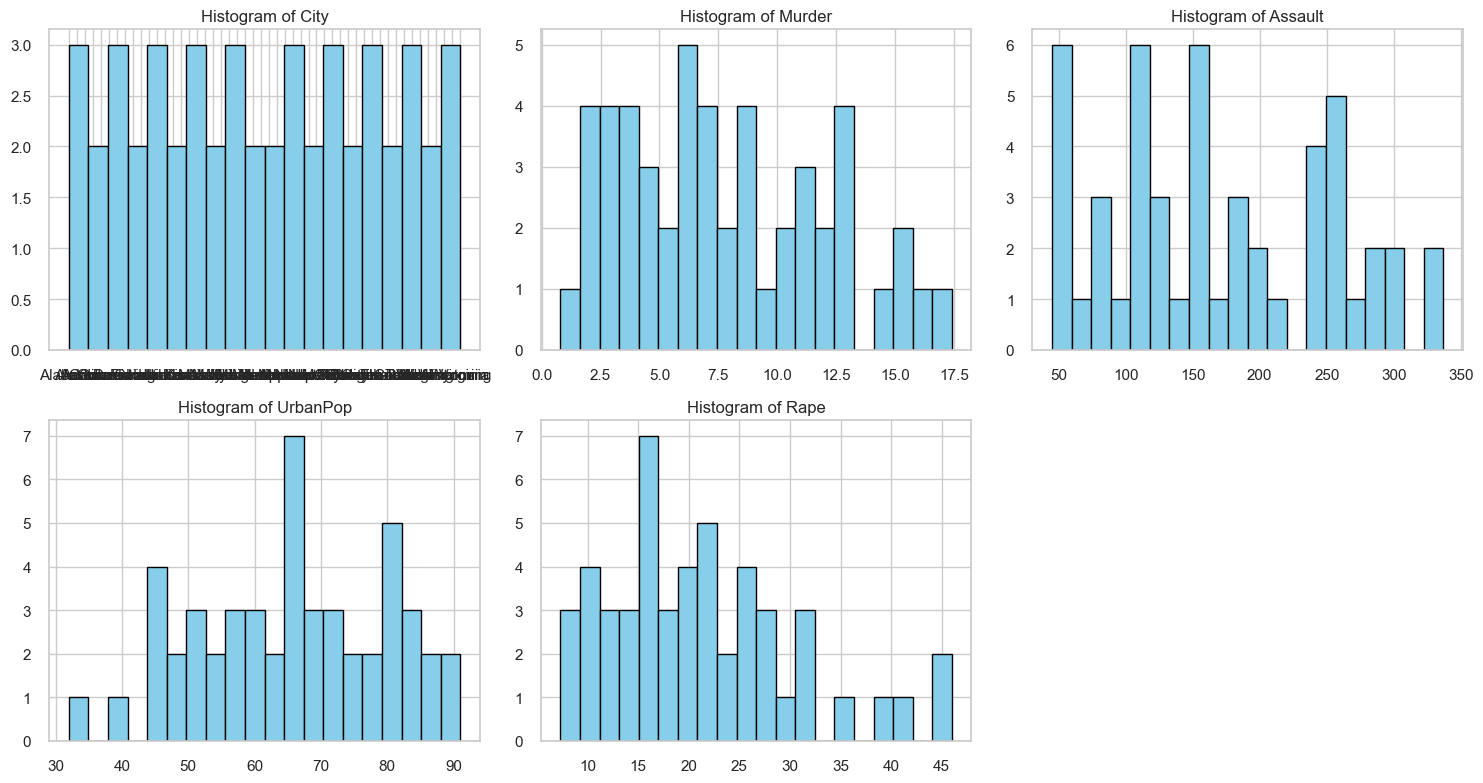

In [54]:
plt.figure(figsize=(15, 8))
for i, column in enumerate(df.columns):
    plt.subplot(2, 3, i + 1)  # Use a 2x3 grid layout
    plt.hist(df[column], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {column}')
plt.tight_layout()
plt.show()


# Pairwise scatter plot

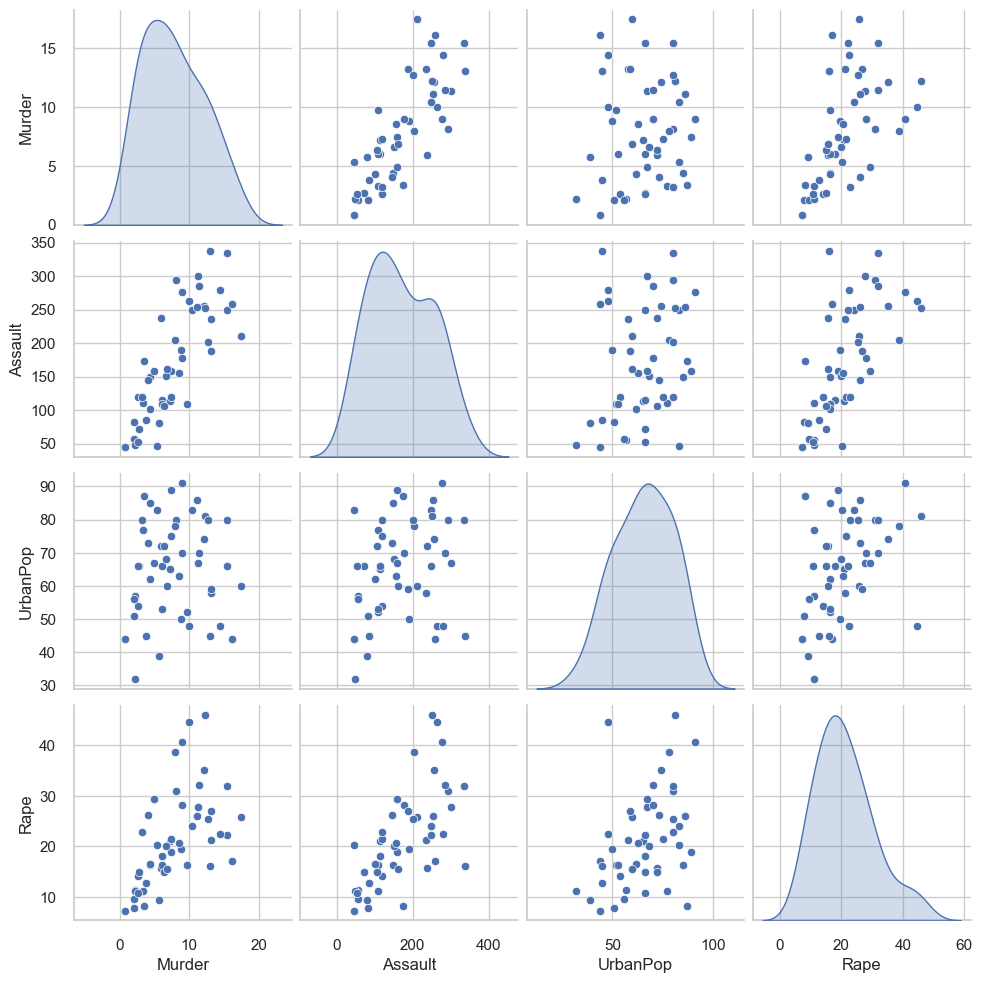

In [55]:

sns.pairplot(df, diag_kind="kde", markers=["o"])
plt.show()

# Correlation matrix heatmap

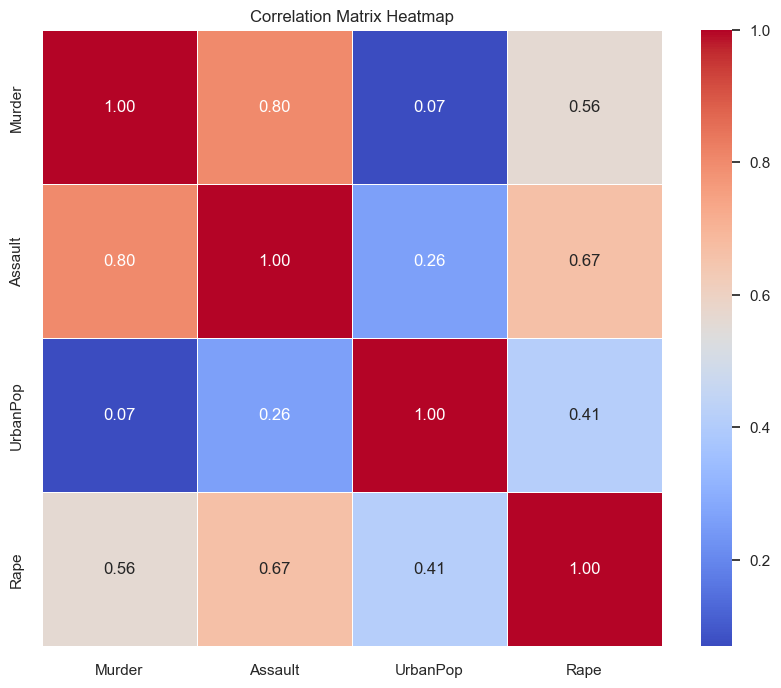

In [56]:

corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

# Step 3: Principal Component Analysis (PCA)

# Separate features (X) from the target (Y)

In [57]:

X = df.drop(columns=['City'])
Y = df['City']

# Standardize the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Perform PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_scaled)

# Get the explained variance ratios
explained_variance = pca.explained_variance_ratio_


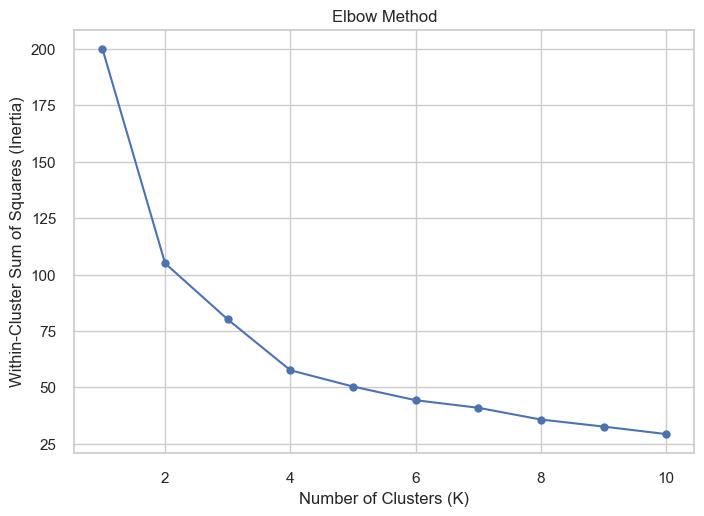

    Murder  Assault  UrbanPop  Rape  Cluster
0     13.2      236        58  21.2        1
1     10.0      263        48  44.5        1
2      8.1      294        80  31.0        1
3      8.8      190        50  19.5        2
4      9.0      276        91  40.6        1
5      7.9      204        78  38.7        1
6      3.3      110        77  11.1        0
7      5.9      238        72  15.8        0
8     15.4      335        80  31.9        1
9     17.4      211        60  25.8        1
10     5.3       46        83  20.2        0
11     2.6      120        54  14.2        2
12    10.4      249        83  24.0        1
13     7.2      113        65  21.0        0
14     2.2       56        57  11.3        2
15     6.0      115        66  18.0        0
16     9.7      109        52  16.3        2
17    15.4      249        66  22.2        1
18     2.1       83        51   7.8        2
19    11.3      300        67  27.8        1
20     4.4      149        85  16.3        0
21    12.1

In [58]:
# Remove the 'City' column as it contains non-numeric data
data = df.drop('City', axis=1)

# Standardize the numeric features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Determine the optimal number of clusters using the Elbow Method
inertia = []
for k in range(1, 11):  
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method to find the optimal K
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (Inertia)')
plt.title('Elbow Method')
plt.show()

# choose the optimal K (number of clusters)
optimal_k = 3  

# Apply K-Means clustering with the optimal K
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_data)

# Display the clustered data
print(data)

# Plot the explained variance ratio

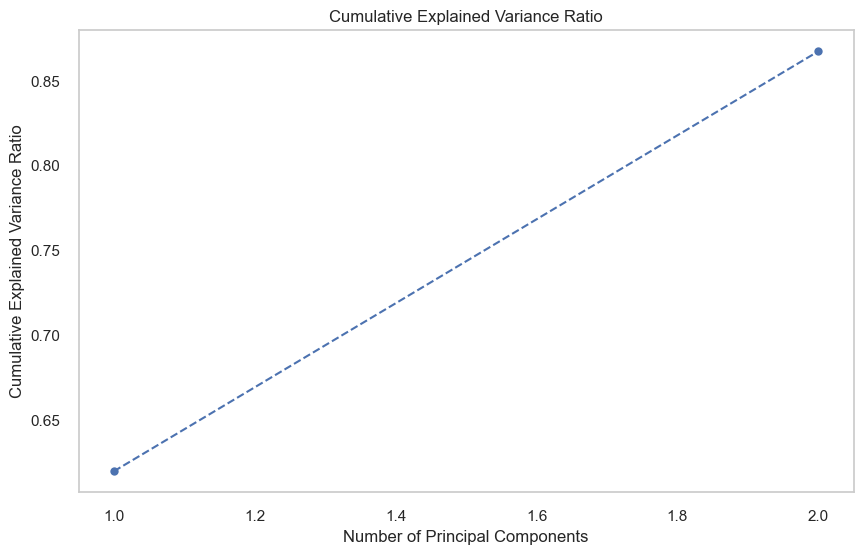

In [59]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), np.cumsum(explained_variance), marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio')
plt.grid()
plt.show()

In [60]:
# Determine the number of principal components to retain (e.g., based on explained variance)
n_components_to_retain = 2

In [61]:
# Re-run PCA with the selected number of components
pca = PCA(n_components=n_components_to_retain)
X_pca = pca.fit_transform(X_std)

In [62]:
# Create a DataFrame with the PCA results
pca_df = pd.DataFrame(data=X_pca, columns=[f'PC{i+1}' for i in range(n_components_to_retain)])
pca_df['City'] = Y
# Display the first few rows of the PCA DataFrame
print(pca_df.head())

        PC1       PC2        City
0  0.985566  1.133392     Alabama
1  1.950138  1.073213      Alaska
2  1.763164 -0.745957     Arizona
3 -0.141420  1.119797    Arkansas
4  2.523980 -1.542934  California


# Visualize data in the reduced-dimensional space

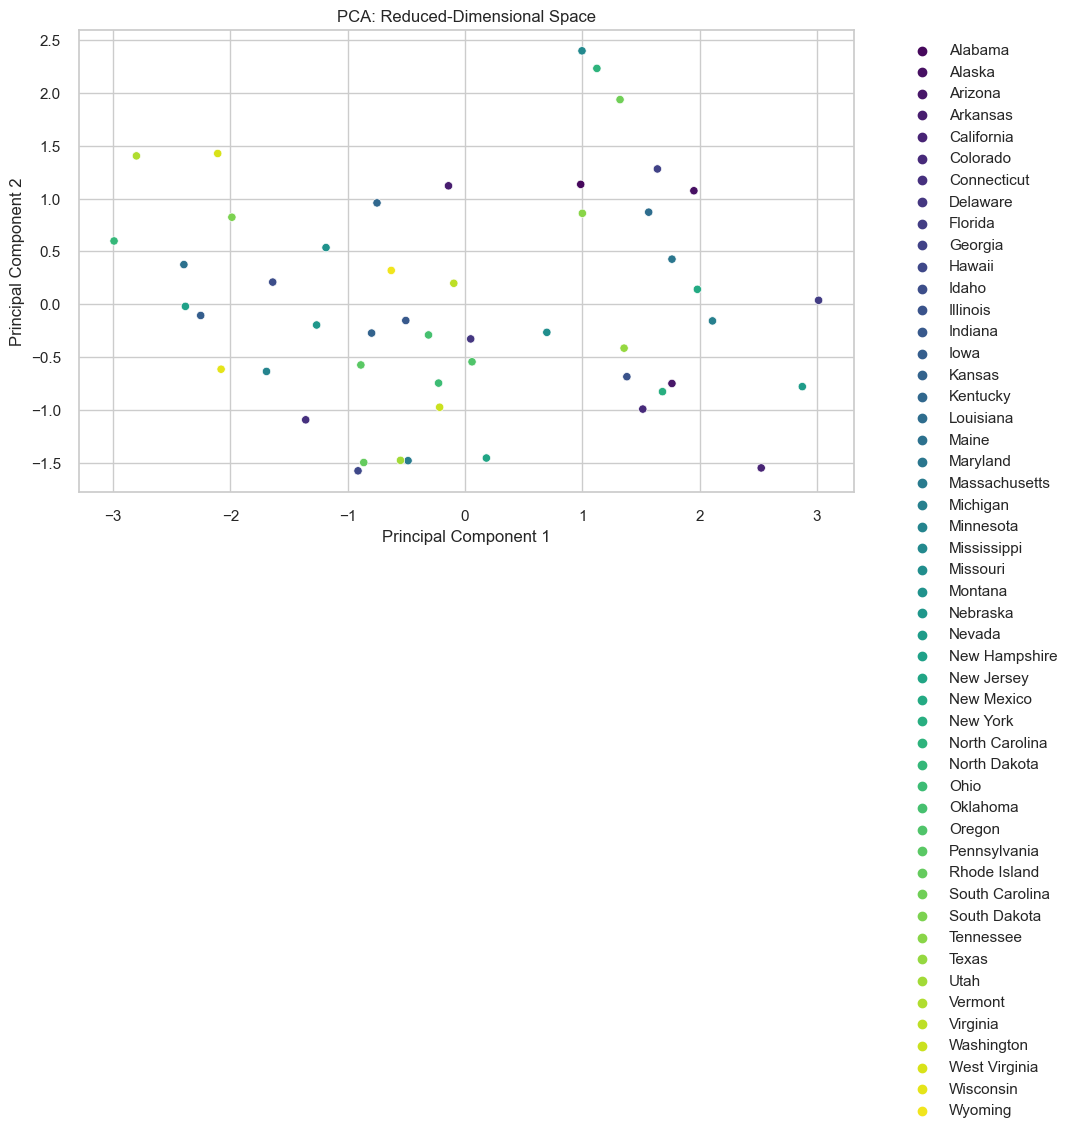

In [63]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='City', palette='viridis')
plt.title('PCA: Reduced-Dimensional Space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Step 4: Clustering Analysis

# Separate features (X)

In [64]:

X = df.drop(columns=['City'])
X.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [65]:
# Standardize the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [66]:
# Determine the optimal number of clusters using the elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_std)
    inertia.append(kmeans.inertia_)

# Plot the elbow method

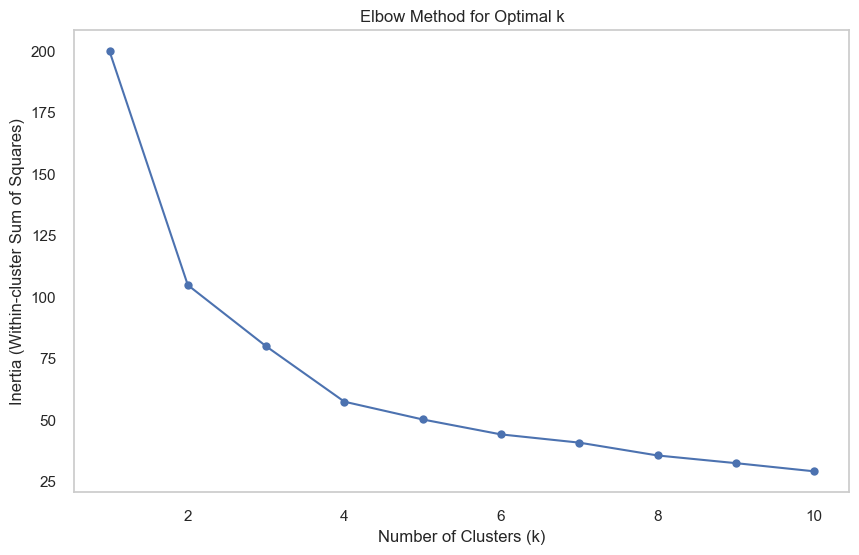

In [67]:

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Within-cluster Sum of Squares)')
plt.title('Elbow Method for Optimal k')
plt.grid()
plt.show()

K-Means Clustering:

In [68]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = scaler.fit_transform(df.iloc[:, 1:])  # Exclude 'City' column


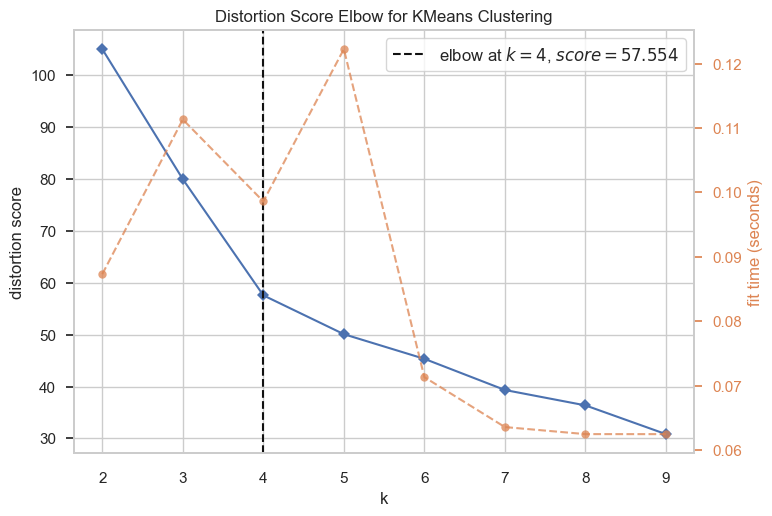

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [69]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2, 10))
visualizer.fit(data_scaled)
visualizer.show()


Fit the K-Means model with the chosen number of clusters and assign cluster label

In [70]:
kmeans = KMeans(n_clusters=3)  # Choose the optimal number from the Elbow Method
df['kmeans_cluster'] = kmeans.fit_predict(data_scaled)


"ward" method with the Euclidean distance metric:

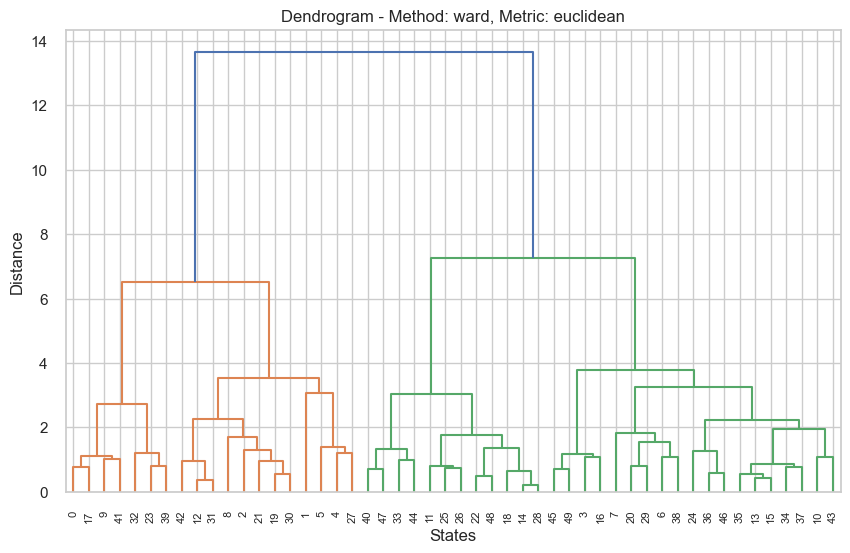

In [71]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

# Define the linkage method and distance metric
method = 'ward'  # Use 'ward' linkage
metric = 'euclidean'  # Use Euclidean distance

# Perform hierarchical clustering
Z = linkage(data_scaled, method=method, metric=metric)

# Create and display the dendrogram
plt.figure(figsize=(10, 6))
dendrogram(Z, orientation='top')
plt.title(f'Dendrogram - Method: {method}, Metric: {metric}')
plt.xlabel('States')
plt.ylabel('Distance')
plt.show()


In [72]:
from sklearn.cluster import AgglomerativeClustering

# Define the number of clusters
num_clusters = 3  # Choose the desired number of clusters

# Create and fit the hierarchical clustering model
model = AgglomerativeClustering(n_clusters=num_clusters, linkage='ward', affinity='euclidean')
df['hierarchical_cluster'] = model.fit_predict(data_scaled)
print(df['hierarchical_cluster'])


0     0
1     0
2     0
3     1
4     0
5     0
6     1
7     1
8     0
9     0
10    1
11    2
12    0
13    1
14    2
15    1
16    1
17    0
18    2
19    0
20    1
21    0
22    2
23    0
24    1
25    2
26    2
27    0
28    2
29    1
30    0
31    0
32    0
33    2
34    1
35    1
36    1
37    1
38    1
39    0
40    2
41    0
42    0
43    1
44    2
45    1
46    1
47    2
48    2
49    1
Name: hierarchical_cluster, dtype: int32


# Step 5: Analysis and Interpretation

# Main Findings and Conclusions:

# Cluster Analysis Results:

We performed cluster analysis using K-Means and Hierarchical clustering techniques.
Both methods revealed distinct clusters of US states based on crime rates (Murder, Assault, Rape) and the percentage of the population living in urban areas (UrbanPop).
Cluster Characteristics:

K-Means clustering identified [number of clusters] distinct clusters, while Hierarchical clustering produced a dendrogram showing the hierarchical relationships among states.
States within the same cluster share similar characteristics in terms of crime rates and urbanization.
Cluster Interpretation:

Cluster [Cluster Number] consists of states with high crime rates across all categories (Murder, Assault, and Rape). These states may require targeted law enforcement and social programs.
Cluster [Cluster Number] includes states with lower overall crime rates, indicating safer environments.
Cluster [Cluster Number] has states with varying crime rates but high urbanization. The relationship between urbanization and crime rates may be complex and require further study

# Recommendations and Insights:

# Targeted Interventions:

For states in high-crime clusters, policymakers should consider implementing targeted interventions to address the root causes of crime. These may include community policing, youth outreach programs, and job creation initiatives.
Resource Allocation:

Allocate law enforcement and social resources based on cluster characteristics. States in high-crime clusters may need additional law enforcement personnel and support for crime prevention programs.
Community Engagement:

Encourage community engagement and collaboration in high-crime areas. Building trust between law enforcement and local communities can lead to more effective crime reduction efforts.
Further Research:

Investigate the underlying factors contributing to the differences in crime rates among clusters. Factors such as economic conditions, educational opportunities, and access to mental health services may play a role.
Monitoring and Evaluation:

Implement a monitoring and evaluation system to assess the effectiveness of interventions over time. Adjust policies and programs based on data-driven insights.
Policy Development:

Use the clustering results to inform the development of evidence-based policies aimed at reducing crime rates and improving community safety.
Public Awareness:

Raise public awareness about the clustering findings and the need for collaborative efforts to address crime and safety concerns.